## Exercise 1.02: Indexing, Slicing, Splitting, and Iterating

Our client wants to prove that our dataset is nicely distributed around the mean value of 100.   
They asked us to run some tests on several subsections of it to make sure they won't get a non-descriptive section of our data.

Look at the mean value of each subtask.

#### Loading the dataset

In [4]:
# importing the necessary dependencies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
# loading the Dataset
dataset = np.genfromtxt('C:/Users/user/Desktop/ITD112/Laboratory_Exercise_1/Datasets/normal_distribution_splittable.csv', delimiter=',')

---

#### Indexing

Since we need several rows of our dataset to complete the given task, we have to use indexing to get the right rows.   
To recap, index: 
- the second row 
- the last row
- the first value of the first row
- the last value of the second to the last row

In [6]:
# indexing the second row of the dataset (2nd row)
second_row = dataset[1]

np.mean(second_row)

96.90038836444445

In [7]:
# indexing the last element of the dataset (last row)
last_row = dataset[-1]

np.mean(last_row)

100.18096645222221

In [8]:
# indexing the first value of the first row (1st row, 1st value)
first_val_first_row = dataset[0][0]

np.mean(first_val_first_row)

99.14931546

In [9]:
# indexing the last value of the second to last row (we want to use the combined access syntax here) 
last_val_second_last_row = dataset[-2, -1]

np.mean(last_val_second_last_row)

101.2226037

---

#### Slicing

Other than the single rows and values we also need to get some subsets of the dataset.   
Use slicing for:
- a 2x2 slice starting from the second row and second element to the 4th element in the 4th row
- every other element of the 5th row
- the content of the last row in reversed order

In [10]:
# slicing an intersection of 4 elements (2x2) of the first two rows and first two columns
subsection_2x2 = dataset[1:3, 1:3]

np.mean(subsection_2x2)

95.63393608250001

##### Why is it not a problem if such a small subsection has a bigger standard deviation from 100?

Several smaller values can cluster in such a small subsection leading to the value being really low.   
If we make our subsection larger, we have a higher chance of getting a more expressive view of our data.

In [11]:
# selecting every second element of the fifth row 
every_other_elem = dataset[4, ::2]

np.mean(every_other_elem)

98.35235805800001

In [12]:
# reversing the entry order, selecting the first two rows in reversed order
reversed_last_row = dataset[-1, ::-1]

np.mean(reversed_last_row)

100.18096645222222

---

#### Splitting

Our client's team only wants to use a small subset of the given dataset.   
Therefore we need to first split it into 3 equal pieces and then give them the first half of the first split.   
They sent us this drawing to show us what they need:
```
1, 2, 3, 4, 5, 6          1, 2     3, 4    5, 6          1, 2  
3, 2, 1, 5, 4, 6    =>    3, 2     1, 5    4, 6    =>    3, 2    =>    1, 2
5, 3, 1, 2, 4, 3          5, 3     1, 2    4, 3                        3, 2
1, 2, 2, 4, 1, 5          1, 2     2, 4    1, 5          5, 3
                                                         1, 2
```

> **Note:**   
We are using a very small dataset here but imagine you have a huge amount of data and only want to look at a small subset of it to tweak your visualizations

In [13]:
# splitting up our dataset horizontally on indices one third and two thirds
hor_splits = np.hsplit(dataset,(3))

In [14]:
# splitting up our dataset vertically on index 2
ver_splits = np.vsplit(hor_splits[0],(2))

In [15]:
# requested subsection of our dataset which has only half the amount of rows and only a third of the columns
print("Dataset", dataset.shape)
print("Subset", ver_splits[0].shape)

Dataset (24, 9)
Subset (12, 3)


---

#### Iterating

Once you sent over the dataset they tell you that they also need a way iterate over the whole dataset element by element as if it would be a one-dimensional list.   
However, they want to also now the position in the dataset itself.

They send you this piece of code and tell you that it's not working as mentioned.   
Come up with the right solution for their needs using the `ndenumerate method`.

In [16]:
# iterating over whole datagmaiset (each value in each row)
curr_index = 0
for x in np.nditer(dataset):
    print(x, curr_index)
    curr_index += 1

99.14931546 0
104.03852715 1
107.43534677 2
97.85230675 3
98.74986914 4
98.80833412 5
96.81964892 6
98.56783189 7
101.34745901 8
92.02628776 9
97.10439252 10
99.32066924 11
97.24584816 12
92.9267508 13
92.65657752 14
105.7197853 15
101.23162942 16
93.87155456 17
95.66253664 18
95.17750125 19
90.93318132 20
110.18889465 21
98.80084371 22
105.95297652 23
98.37481387 24
106.54654286 25
107.22482426 26
91.37294597 27
100.96781394 28
100.40118279 29
113.42090475 30
105.48508838 31
91.6604946 32
106.1472841 33
95.08715803 34
103.40412146 35
101.20862522 36
103.5730309 37
100.28690912 38
105.85269352 39
93.37126331 40
108.57980357 41
100.79478953 42
94.20019732 43
96.10020311 44
102.80387079 45
98.29687616 46
93.24376389 47
97.24130034 48
89.03452725 49
96.2832753 50
104.60344836 51
101.13442416 52
97.62787811 53
106.71751618 54
102.97585605 55
98.45723272 56
100.72418901 57
106.39798503 58
95.46493436 59
94.35373179 60
106.83273763 61
100.07721494 62
96.02548256 63
102.82360856 64
106.475518

In [17]:
# iterating over whole dataset with indices matching the position in the dataset
for index, value in np.ndenumerate(dataset):
    print(index, value)

(0, 0) 99.14931546
(0, 1) 104.03852715
(0, 2) 107.43534677
(0, 3) 97.85230675
(0, 4) 98.74986914
(0, 5) 98.80833412
(0, 6) 96.81964892
(0, 7) 98.56783189
(0, 8) 101.34745901
(1, 0) 92.02628776
(1, 1) 97.10439252
(1, 2) 99.32066924
(1, 3) 97.24584816
(1, 4) 92.9267508
(1, 5) 92.65657752
(1, 6) 105.7197853
(1, 7) 101.23162942
(1, 8) 93.87155456
(2, 0) 95.66253664
(2, 1) 95.17750125
(2, 2) 90.93318132
(2, 3) 110.18889465
(2, 4) 98.80084371
(2, 5) 105.95297652
(2, 6) 98.37481387
(2, 7) 106.54654286
(2, 8) 107.22482426
(3, 0) 91.37294597
(3, 1) 100.96781394
(3, 2) 100.40118279
(3, 3) 113.42090475
(3, 4) 105.48508838
(3, 5) 91.6604946
(3, 6) 106.1472841
(3, 7) 95.08715803
(3, 8) 103.40412146
(4, 0) 101.20862522
(4, 1) 103.5730309
(4, 2) 100.28690912
(4, 3) 105.85269352
(4, 4) 93.37126331
(4, 5) 108.57980357
(4, 6) 100.79478953
(4, 7) 94.20019732
(4, 8) 96.10020311
(5, 0) 102.80387079
(5, 1) 98.29687616
(5, 2) 93.24376389
(5, 3) 97.24130034
(5, 4) 89.03452725
(5, 5) 96.2832753
(5, 6) 104.6034

# GRAPH --------------------------------------------------------------------------------------------------

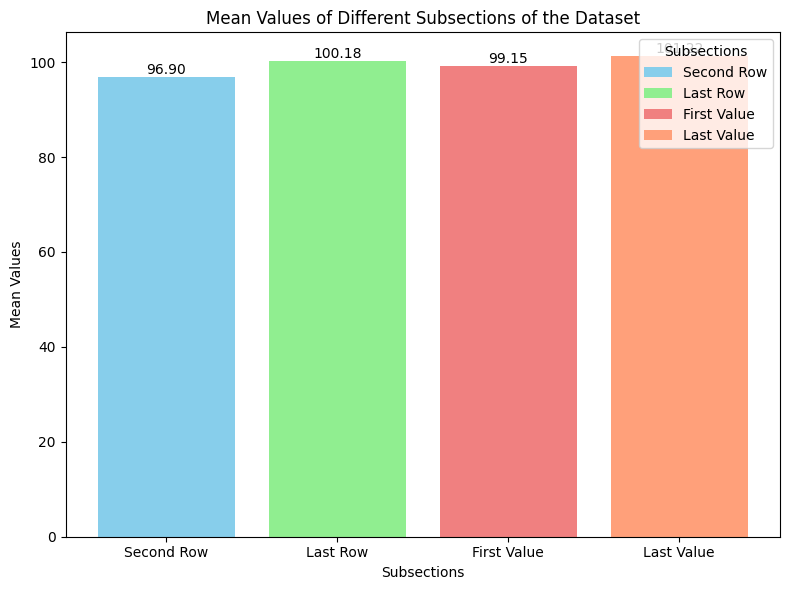

In [19]:
# Calculate the mean values for different subsections
mean_values = [
    np.mean(dataset[1]),  # Second Row
    np.mean(dataset[-1]),  # Last Row
    np.mean(dataset[0, 0]),  # First Value of the First Row
    np.mean(dataset[-2, -1])  # Last Value of the Second to Last Row
]

# Labels for the subsections
subsections = ['Second Row', 'Last Row', 'First Value', 'Last Value']

# Colors for the bars
colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon']

# Create a bar chart with legend
plt.figure(figsize=(8, 6))
bars = plt.bar(subsections, mean_values, color=colors)
plt.xlabel('Subsections')
plt.ylabel('Mean Values')
plt.title('Mean Values of Different Subsections of the Dataset')
plt.xticks(rotation=0)

# Add mean values as text above the bars
for bar, mean in zip(bars, mean_values):
    plt.text(bar.get_x() + bar.get_width() / 2, mean, f'{mean:.2f}', ha='center', va='bottom')

# Create a legend
legend_labels = ['Second Row', 'Last Row', 'First Value', 'Last Value']
legend = plt.legend(bars, legend_labels, title='Subsections', loc='upper right')

plt.tight_layout()
plt.show()

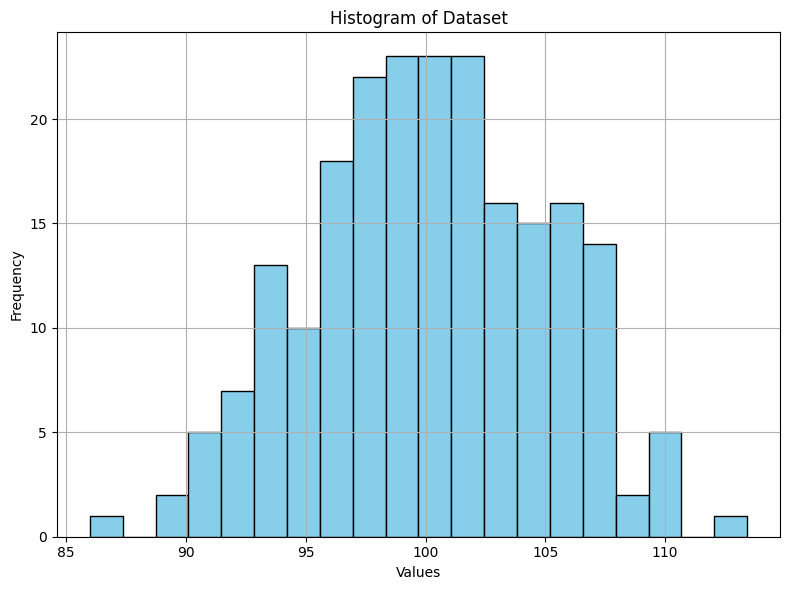

In [22]:
# Flatten the dataset to create a 1D array
flat_dataset = dataset.flatten()

# Create a histogram
plt.figure(figsize=(8, 6))
plt.hist(flat_dataset, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Dataset')
plt.grid(True)

plt.tight_layout()
plt.show()